# Knn    -    K-Nearest Neighbors

## importing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

## Downloading Dataset


In [3]:
!wget -O teleCust1000t.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv

--2023-01-25 18:05:20--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36047 (35K) [text/csv]
Saving to: ‘teleCust1000t.csv’

teleCust1000t.csv   100%[===================>]  35.20K  14.3KB/s    in 2.5s    

2023-01-25 18:05:33 (14.3 KB/s) - ‘teleCust1000t.csv’ saved [36047/36047]



### Reading the data with pandas


In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.shape

(1000, 12)

In [7]:
df.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


In [8]:
#value_counts shows that how number of value exist for any custcat param 
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [9]:
print(df.columns)
# print(dir(df)) #dir shows used subval 

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


### Data Visualization and Analysis

<AxesSubplot: >

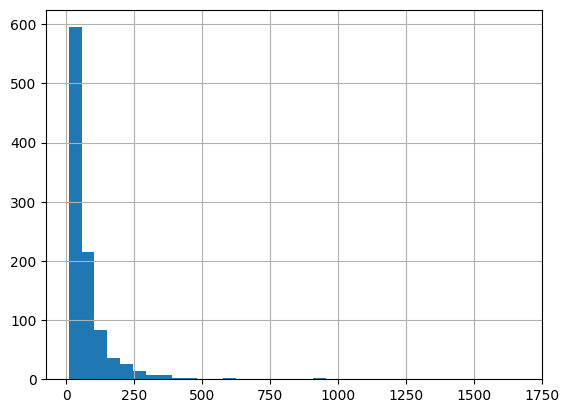

In [11]:
#bins divides the entire range of values into a series of intervals 
df['income'].hist(bins=35)

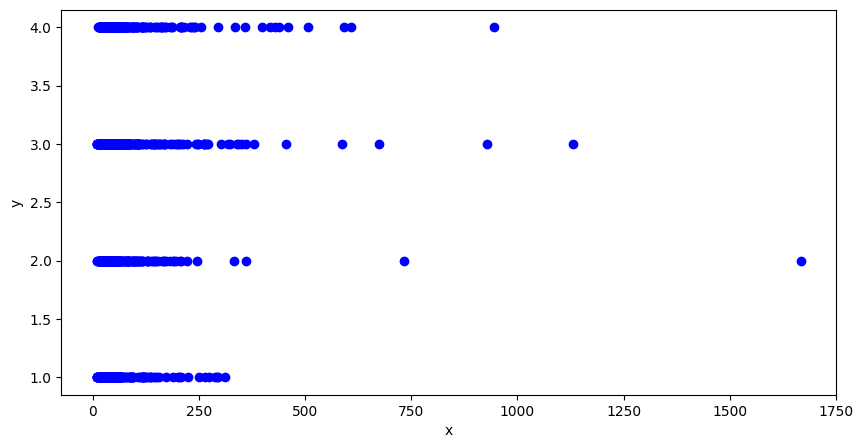

In [12]:
x_data, y_data = (df["income"].values, df["custcat"].values)
plt.figure(figsize=(10,5)) #size plt x,y
plt.plot(x_data, y_data, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Making dataset

- To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [16]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0]

array([ 2., 13., 44.,  1.,  9., 64.,  4.,  5.,  0.,  0.,  2.])

In [17]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

### Normalizing Data
- we should do Normalizing

In [18]:
print(X[0:5])

[[  2.  13.  44.   1.   9.  64.   4.   5.   0.   0.   2.]
 [  3.  11.  33.   1.   7. 136.   5.   5.   0.   0.   6.]
 [  3.  68.  52.   1.  24. 116.   1.  29.   0.   1.   2.]
 [  2.  33.  33.   0.  12.  33.   2.   0.   0.   1.   1.]
 [  2.  23.  30.   1.   9.  30.   1.   2.   0.   0.   4.]]


In [19]:
fitting = preprocessing.StandardScaler().fit(X)
X = fitting.transform(X.astype(float))
print(X[0:5])

[[-0.02696767 -1.055125    0.18450456  1.0100505  -0.25303431 -0.12650641
   1.0877526  -0.5941226  -0.22207644 -1.03459817 -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243  1.0100505  -0.4514148   0.54644972
   1.9062271  -0.5941226  -0.22207644 -1.03459817  2.55666158]
 [ 1.19883553  1.52109247  0.82182601  1.0100505   1.23481934  0.35951747
  -1.36767088  1.78752803 -0.22207644  0.96655883 -0.23065004]
 [-0.02696767 -0.11831864 -0.69181243 -0.9900495   0.04453642 -0.41625141
  -0.54919639 -1.09029981 -0.22207644  0.96655883 -0.92747794]
 [-0.02696767 -0.58672182 -0.93080797  1.0100505  -0.25303431 -0.44429125
  -1.36767088 -0.89182893 -0.22207644 -1.03459817  1.16300577]]


### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

#If we use random_state = 4 , data is allocated every time with the same mode
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,train_size=0.8, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Training Model

- K nearest neighbor (KNN) - Classifier
- [link KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
k = 5
scaler = KNeighborsClassifier(n_neighbors = k)
neigh = scaler.fit(X_train,y_train)

neigh

KNeighborsClassifier()

### Predicting
- first prediction

In [28]:
yhat = neigh.predict(X_test) #it obtains y-predict 
yhat[0:10]

/home/mahdi/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 3, 3, 4, 4, 3, 3, 4, 2, 4])

In [29]:
y[0:10]

array([1, 4, 3, 1, 3, 3, 2, 4, 3, 2])

- second prediction


In [33]:
xx = np.array([[ 2., 13., 44.,  1.,  9., 64.,  4.,  5.,  0.,  0.,  2.]])
nxx = fitting.transform(xx)
ynxx_hat = neigh.predict(nxx) #it obtains y-predict 
ynxx_hat #answer: class n

/home/mahdi/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1])

### Accuracy evaluation

In [35]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5375
Test set Accuracy:  0.315


/home/mahdi/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### evaluating the best between 1-10

In [36]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])


/home/mahdi/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/home/mahdi/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set 

In [39]:
mean_acc
# output : For example, if k is equal to 2, the accuracy is 29%

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

In [181]:
# for x,y in enumerate(mean_acc):
#    print(x,y)

In [40]:
print( "The best accuracy was with", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k = 9


### Plot the model accuracy for a different number of neighbors

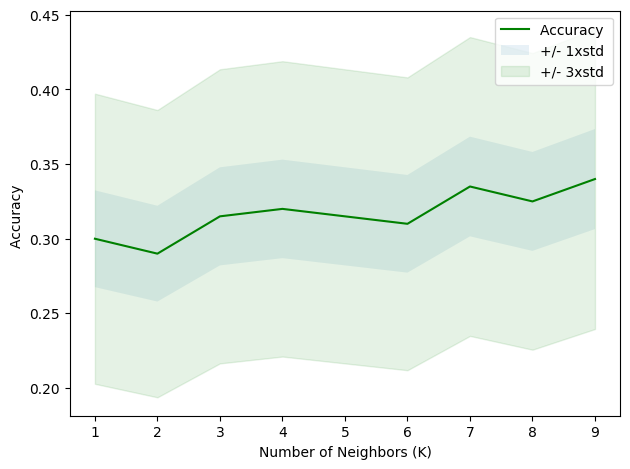

In [41]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

### Confusion Matrix Test

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, yhat, [1,2,3,4])
print(cm)
print(classification_report(y_test, yhat))

[[26  7 13  5]
 [ 6 15 11 12]
 [21 10 18  5]
 [18 12 12  9]]
              precision    recall  f1-score   support

           1       0.37      0.51      0.43        51
           2       0.34      0.34      0.34        44
           3       0.33      0.33      0.33        54
           4       0.29      0.18      0.22        51

    accuracy                           0.34       200
   macro avg       0.33      0.34      0.33       200
weighted avg       0.33      0.34      0.33       200



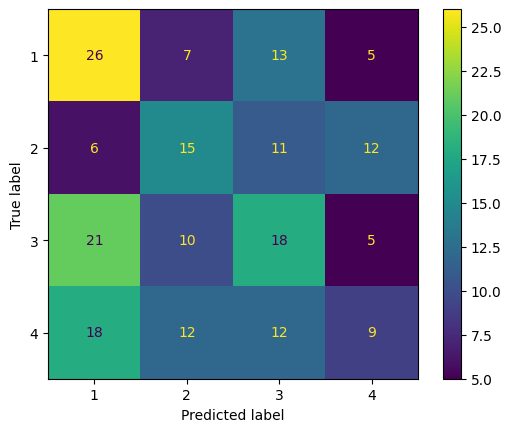

In [239]:
cm_display = ConfusionMatrixDisplay(cm,display_labels=(1,2,3,4)).plot()

### f1_score

In [48]:
from sklearn.metrics import f1_score

In [52]:
f1_score(y_test, yhat, average='macro')

0.32999603189027416